In [1]:
conda install eli5

Solving environment: ...working... 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/win-64::anaconda==2019.03=py37_0
done

## Package Plan ##

  environment location: C:\Users\lilyx\Anaconda3

  added / updated specs:
    - eli5


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.3.9           |           py37_0         155 KB
    conda-4.6.14               |           py37_0         2.1 MB
    ------------------------------------------------------------
                                           Total:         2.3 MB

The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates    conda-forge::ca-certificates-2019.3.9~ --> pkgs/main::ca-certificates-2019.1.23-0
  certifi                                       conda-forge --> pkgs/main
  conda              

In [2]:
conda install -c conda-forge category_encoders 

Solving environment: ...working... 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/win-64::anaconda==2019.03=py37_0
done

## Package Plan ##

  environment location: C:\Users\lilyx\Anaconda3

  added / updated specs:
    - category_encoders


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.3.9           |           py37_0         149 KB  conda-forge
    conda-4.6.14               |           py37_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.3 MB

The following packages will be UPDATED:

  ca-certificates    pkgs/main::ca-certificates-2019.1.23-0 --> conda-forge::ca-certificates-2019.3.9-hecc5488_0
  openssl              pkgs/main::openssl-1.1.1b-he774522_1 --> conda-forge::o

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(138): Could not remove or rename C:\Users\lilyx\Anaconda3\Library\bin\libcrypto-1_1-x64.dll.c~.  Please remove this file manually (you may need to reboot to free file handles)


In [3]:
pip install mlxtend  

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [4]:
import pandas as pd
import seaborn as sns
import warnings
import category_encoders as ce
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.exceptions import DataConversionWarning
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
from IPython.display import display
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions
warnings.filterwarnings(action='ignore', category=DataConversionWarning)


test_features = pd.read_csv('test_features.csv')
train_features = pd.read_csv('train_features.csv')
train_labels = pd.read_csv('train_labels.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [5]:
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999
test_features.head(1)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,Internal,Magoma,Manyara,21,3,Mbulu,Bashay,321,True,GeoData Consultants Ltd,Parastatal,NaN,True,2012,other,other,other,parastatal,parastatal,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other


In [6]:
train_features.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group'],
      dtype='object')

In [7]:
train_labels.head(1)

,id,status_group
0,69572,functional


In [8]:
train_features.shape, test_features.shape

((59400, 40), (14358, 40))

In [9]:
train = pd.merge(train_labels, train_features, on='id', how='inner')
train.head(1)

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,functional,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [10]:
train['quantity'].value_counts(normalize = True)

enough          0.558687
insufficient    0.254697
dry             0.105152
seasonal        0.068182
unknown         0.013283
Name: quantity, dtype: float64

In [11]:
train['status_group'].value_counts(normalize = True)

functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64

In [12]:
forgeoplotting = train.loc[train['longitude'] != 0]
train.shape, forgeoplotting.shape

((59400, 41), (57588, 41))

In [13]:
train.isna().sum()

id                           0
status_group                 0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_qu

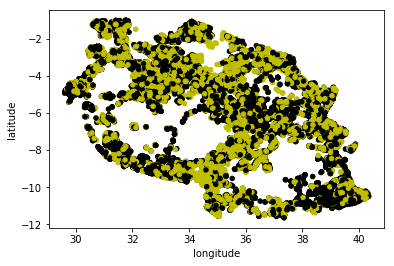

In [14]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
colors = np.where(forgeoplotting['status_group']=='functional','y','k')
forgeoplotting.plot.scatter(x = 'longitude', y = 'latitude', c = colors)

In [15]:
# df_status_group = train_labels
# train_labels['df_y_pred'] = pd.DataFrame(y_pred)
# train_labels['quantity'] = train['quantity']
# train_labels.head(10)

In [16]:
#Baseline on predicting function if dry 
y_pred = []
for i in train['quantity']:
    if i == 'dry':
        y_pred.append('non functional')
    else: 
        y_pred.append('functional')
accuracy_score(train['status_group'], y_pred)

0.6423232323232323

In [17]:
#Baseline on predicting function if dry and seasonal
y_pred = []
for i in train['quantity']:
    if i == 'dry':
        y_pred.append('non functional')
    elif i == 'seasonal': 
        y_pred.append('functional')
    else: 
        y_pred.append('functional')
accuracy_score(train['status_group'], y_pred)

0.6423232323232323

In [18]:
#Baseline on predicting function if dry and insufficient
y_pred = []
for i in train['quantity']:
    if i == 'dry':
        y_pred.append('non functional')
    elif i == 'insufficient':
        y_pred.append('non functional')
    else: 
        y_pred.append('functional')
accuracy_score(train['status_group'], y_pred)

0.6060774410774411

In [19]:
#Baseline on predicting function if dry, unknown and insufficient
y_pred = []
for i in train['quantity']:
    if i == 'dry':
        y_pred.append('non functional')
    elif i == 'unknown':
        y_pred.append('non functional')
    elif i == 'insufficient':
        y_pred.append('non functional')
    else: 
        y_pred.append('functional')
accuracy_score(train['status_group'], y_pred)

0.6119528619528619

In [20]:
#Baseline on predicting function if dry, seasonal and insufficient
y_pred = []
for i in train['quantity']:
    if i == 'dry':
        y_pred.append('non functional')
    elif i == 'seasonal':
        y_pred.append('non functional')
    elif i == 'insufficient':
        y_pred.append('non functional')
    else: 
        y_pred.append('functional')
accuracy_score(train['status_group'], y_pred)

0.5889730639730639

In [21]:
#Baseline on predicting function if dry, seasonal, unknown and insufficient
y_pred = []
for i in train['quantity']:
    if i == 'dry':
        y_pred.append('non functional')
    elif i == 'seasonal':
        y_pred.append('non functional')
    elif i == 'insufficient':
        y_pred.append('non functional')
    elif i == 'unknown':
        y_pred.append('non functional')
    else: 
        y_pred.append('functional')
accuracy_score(train['status_group'], y_pred)

0.5948484848484848

In [22]:
#Baseline on predicting function if dry and unknown
y_pred = []
for i in train['quantity']:
    if i == 'dry':
        y_pred.append('non functional')
    elif i == 'unknown':
        y_pred.append('non functional')
    else: 
        y_pred.append('functional')
accuracy_score(train['status_group'], y_pred)

0.6481986531986532

In [23]:
nonum = train.select_dtypes(exclude='number')
nonum.columns

Index(['status_group', 'date_recorded', 'funder', 'installer', 'wpt_name',
       'basin', 'subvillage', 'region', 'lga', 'ward', 'public_meeting',
       'recorded_by', 'scheme_management', 'scheme_name', 'permit',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group'],
      dtype='object')

In [24]:
train.describe(exclude='number').T.sort_values(by='unique')

,count,unique,top,freq
recorded_by,59400,1,GeoData Consultants Ltd,59400
permit,56344,2,True,38852
public_meeting,56066,2,True,51011
status_group,59400,3,functional,32259
source_class,59400,3,groundwater,45794
quantity_group,59400,5,enough,33186
quantity,59400,5,enough,33186
management_group,59400,5,user-group,52490
quality_group,59400,6,good,50818
waterpoint_type_group,59400,6,communal standpipe,34625


In [25]:

from sklearn.model_selection import train_test_split

def train_validation_test_split(
    X, y, train_size=0.8, val_size=0.1, test_size=0.1, 
    random_state=None, shuffle=True):
        
    assert train_size + val_size + test_size == 1
    
    X_train_val, X_test, y_train_val, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, shuffle=shuffle)
    
    X_train, X_val, y_train, y_val = train_test_split(
        X_train_val, y_train_val, test_size=val_size/(train_size+val_size), 
        random_state=random_state, shuffle=shuffle)
    
    return X_train, X_val, X_test, y_train, y_val, y_test

In [105]:
X = train.drop(columns='status_group')
y = train['status_group']

X_train, X_val, X_test = np.split(X.sample(frac=1), [int(.6*len(X)), int(.8*len(X))])
y_train, y_val, y_test = np.split(y.sample(frac=1), [int(.6*len(y)), int(.8*len(y))])

def wrangle(X):
    X = X.copy()
    
    lb_make = LabelEncoder()
    
    # Transform features with many nulls to binary flags
    many_nulls = ['funder',
                  'installer',
                  'subvillage',
                  'public_meeting',
                  'scheme_management',
                  'scheme_name',
                  'permit']

    for col in many_nulls:
        X[col] = X[col].isnull()
    
    # For features with few nulls, do mean imputation
    for col in X:
        if X[col].isnull().sum() > 0:
            X[col] = X[col].fillna(X[col].mean())
    
    X = X.fillna('Unknown')
            
    X["funder_num"] = lb_make.fit_transform(X["funder"])
    X["installer_num"] = lb_make.fit_transform(X["installer"])
    X["wpt_name_num"] = lb_make.fit_transform(X["wpt_name"])
    X["basin_num"] = lb_make.fit_transform(X["basin"])
    X["subvillage_num"] = lb_make.fit_transform(X["subvillage"])
    X["region_num"] = lb_make.fit_transform(X["region"])
    X["lga_num"] = lb_make.fit_transform(X["lga"])
    X["ward_num"] = lb_make.fit_transform(X["ward"])
    X["public_meeting_num"] = lb_make.fit_transform(X["public_meeting"])
    X["recorded_by_num"] = lb_make.fit_transform(X["recorded_by"])
    X["scheme_management_num"] = lb_make.fit_transform(X["scheme_management"])
    X["scheme_name_num"] = lb_make.fit_transform(X["scheme_name"])
    X["permit_num"] = lb_make.fit_transform(X["permit"])
    X["extraction_type_num"] = lb_make.fit_transform(X["extraction_type"])
    X["extraction_type_group_num"] = lb_make.fit_transform(X["extraction_type_group"])
    X["extraction_type_class_num"] = lb_make.fit_transform(X["extraction_type_class"])
    X["management_num"] = lb_make.fit_transform(X["management"])
    X["management_group_num"] = lb_make.fit_transform(X["management_group"])
    X["payment_num"] = lb_make.fit_transform(X["payment"])
    X["payment_type_num"] = lb_make.fit_transform(X["payment_type"])
    X["water_quality_num"] = lb_make.fit_transform(X["water_quality"])
    X["quality_group_num"] = lb_make.fit_transform(X["quality_group"])
    X["quantity_num"] = lb_make.fit_transform(X["quantity"])
    X["quantity_group_num"] = lb_make.fit_transform(X["quantity_group"])
    X["source_num"] = lb_make.fit_transform(X["source"])
    X["source_type_num"] = lb_make.fit_transform(X["source_type"])
    X["source_class_num"] = lb_make.fit_transform(X["source_class"])
    X["waterpoint_type_num"] = lb_make.fit_transform(X["waterpoint_type"])
    X["waterpoint_type_group_num"] = lb_make.fit_transform(X["waterpoint_type_group"])
    
    X = X.drop(columns = 'lga')
    X = X.drop(columns = 'date_recorded')
    X = X.drop(columns = 'funder')
    X = X.drop(columns = 'ward')
    X = X.drop(columns = 'installer')
    X = X.drop(columns = 'scheme_name')
    X = X.drop(columns = 'subvillage')
    X = X.drop(columns = 'wpt_name')
    X = X.drop(columns = 'latitude')
    X = X.drop(columns = 'longitude')
    X = X.drop(columns = 'id')
    
    # Return the wrangled dataframe
    return X


# Wrangle train and test in the same way
X_train = wrangle(X_train)
X_val = wrangle(X_val)
X_test  = wrangle(X_test)

X_train = X_train.select_dtypes('number')
X_test = X_test.select_dtypes('number')

X_val = X_val.select_dtypes('number')
X_val = X_val.select_dtypes('number')

y_train = y_train.replace(['functional', 'functional needs repair', 'non functional'], [1, 0, 0])
y_val = y_val.replace(['functional', 'functional needs repair', 'non functional'], [1, 0, 0])
y_test = y_test.replace(['functional', 'functional needs repair', 'non functional'], [1, 0, 0])


In [106]:
X_val.head(1)

,amount_tsh,gps_height,num_private,region_code,district_code,population,construction_year,funder_num,installer_num,wpt_name_num,basin_num,subvillage_num,region_num,lga_num,ward_num,public_meeting_num,recorded_by_num,scheme_management_num,scheme_name_num,permit_num,extraction_type_num,extraction_type_group_num,extraction_type_class_num,management_num,management_group_num,payment_num,payment_type_num,water_quality_num,quality_group_num,quantity_num,quantity_group_num,source_num,source_type_num,source_class_num,waterpoint_type_num,waterpoint_type_group_num
49805,10.0,1194,0,3,5,50,1999,0,0,103,5,0,6,16,1000,0,0,0,0,0,3,1,0,9,4,4,5,6,2,1,1,8,6,0,1,1


In [107]:
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((35640, 36), (11880, 36), (11880, 36), (35640,), (11880,), (11880,))

In [108]:
from sklearn.preprocessing import MinMaxScaler

pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True), 
    MinMaxScaler(), 
    LogisticRegression(solver='lbfgs', max_iter=1000)
)

from sklearn.model_selection import cross_val_predict

y_pred_proba = cross_val_predict(pipeline, X_train, y_train, cv=3, n_jobs=-1, 
                                 method='predict_proba')[:,1]

In [109]:
threshold = 0.55#% confidence people will sign up
#how many positive predictions we want
y_pred = y_pred_proba >= threshold
correct = y_pred == y_train

labels = pd.DataFrame({'Ground Truth': y_train, 
                       'Predicted Probability': y_pred_proba, 
                       'Discrete Prediction': y_pred, 
                       'Correct Prediction?': correct})

labels.head(20)

,Ground Truth,Predicted Probability,Discrete Prediction,Correct Prediction?
37108,1,0.551386,True,True
27579,1,0.548189,False,False
34703,0,0.565346,True,False
30873,0,0.530549,False,True
7400,0,0.548983,False,True
52471,0,0.544579,False,True
13248,0,0.550831,True,False
55268,0,0.553407,True,False
48723,0,0.551373,True,False
49422,0,0.633698,True,False


In [110]:
print('accuracy', accuracy_score(y_train, y_pred))

accuracy 0.49054433221099886


In [111]:
threshold = 0.5#% confidence people will sign up
y_pred = y_pred_proba >= threshold
correct = y_pred == y_train

labels = pd.DataFrame({'Ground Truth': y_train, 
                       'Predicted Probability': y_pred_proba, 
                       'Discrete Prediction': y_pred, 
                       'Correct Prediction?': correct})
print('accuracy', accuracy_score(y_train, y_pred))

accuracy 0.5439955106621773


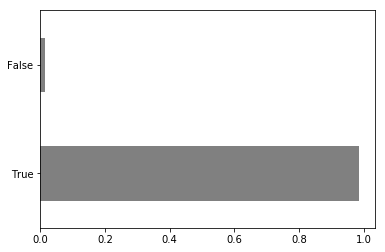

In [112]:
labels['Discrete Prediction'].value_counts(normalize=True).plot.barh(color='grey');

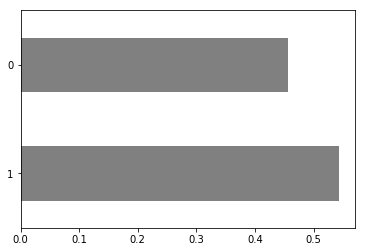

In [113]:
labels['Ground Truth'].value_counts(normalize=True).plot.barh(color='grey');

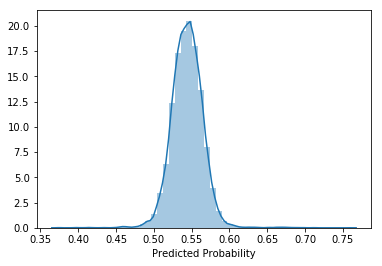

In [114]:
import seaborn as sns
sns.distplot(labels['Predicted Probability']);

In [115]:
from sklearn.metrics import classification_report, confusion_matrix

threshold = 0.54
y_pred = y_pred_proba >= threshold

print(classification_report(y_train, y_pred))
print('accuracy', accuracy_score(y_train, y_pred))

pd.DataFrame(confusion_matrix(y_train, y_pred), 
             columns=['Predicted Negative', 'Predicted Positive'], 
             index=['Actual Negative', 'Actual Positive'])#make a dataframe out of the output

              precision    recall  f1-score   support

           0       0.45      0.42      0.43     16247
           1       0.54      0.58      0.56     19393

   micro avg       0.50      0.50      0.50     35640
   macro avg       0.50      0.50      0.50     35640
weighted avg       0.50      0.50      0.50     35640

accuracy 0.5039001122334456


,Predicted Negative,Predicted Positive
Actual Negative,6753,9494
Actual Positive,8187,11206


In [116]:
encoder = ce.OneHotEncoder(use_cat_names=True)
log_reg = LogisticRegression(solver='lbfgs', max_iter=1000)

X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded  = encoder.transform(X_test)
scores = cross_val_score(log_reg, X_train, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.54417952 0.54417952 0.54417952 0.54405163 0.54405163 0.54461279
 0.54433221 0.54420432 0.54420432 0.54420432]


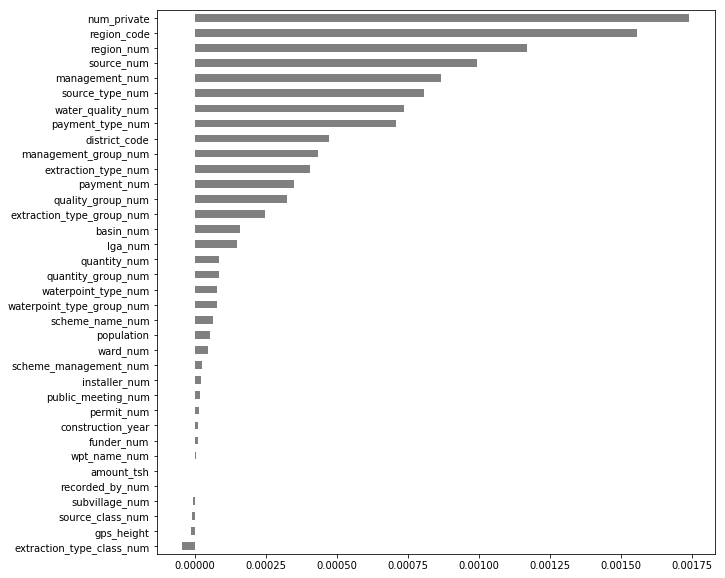

In [117]:
log_reg.fit(X_train, y_train)
coefficients = pd.Series(log_reg.coef_[0], X_train_encoded.columns)
plt.figure(figsize=(10,10))
coefficients.sort_values().plot.barh(color='grey');

In [118]:
model = LogisticRegression(solver='lbfgs', multi_class='auto')
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.5446969696969697

In [119]:
y.value_counts(normalize=True)

functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64

In [120]:
def viz2D(fitted_model, X, feature1, feature2, num=100, title=''):
    """
    Visualize model predictions as a 2D heatmap
    For regression or binary classification models, fitted on 2 features
    
    Parameters
    ----------
    fitted_model : scikit-learn model, already fitted
    df : pandas dataframe, which was used to fit model
    feature1 : string, name of feature 1
    feature2 : string, name of feature 2
    target : string, name of target
    num : int, number of grid points for each feature
    
    Returns
    -------
    predictions: numpy array, predictions/predicted probabilities at each grid point
    
    References
    ----------
    https://scikit-learn.org/stable/auto_examples/classification/plot_classification_probability.html
    https://jakevdp.github.io/PythonDataScienceHandbook/04.04-density-and-contour-plots.html
    """
    x1 = np.linspace(X[feature1].min(), X[feature1].max(), num)
    x2 = np.linspace(X[feature2].min(), X[feature2].max(), num)
    X1, X2 = np.meshgrid(x1, x2)
    X = np.c_[X1.flatten(), X2.flatten()]
    if hasattr(fitted_model, 'predict_proba'):
        predicted = fitted_model.predict_proba(X)[:,1]
    else:
        predicted = fitted_model.predict(X)
    
    plt.imshow(predicted.reshape(num, num), cmap='viridis')
    plt.title(title)
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.xticks([])
    plt.yticks([])
    plt.colorbar()
    plt.show()
    return predicted

In [121]:
X_train.columns

Index(['amount_tsh', 'gps_height', 'num_private', 'region_code',
       'district_code', 'population', 'construction_year', 'funder_num',
       'installer_num', 'wpt_name_num', 'basin_num', 'subvillage_num',
       'region_num', 'lga_num', 'ward_num', 'public_meeting_num',
       'recorded_by_num', 'scheme_management_num', 'scheme_name_num',
       'permit_num', 'extraction_type_num', 'extraction_type_group_num',
       'extraction_type_class_num', 'management_num', 'management_group_num',
       'payment_num', 'payment_type_num', 'water_quality_num',
       'quality_group_num', 'quantity_num', 'quantity_group_num', 'source_num',
       'source_type_num', 'source_class_num', 'waterpoint_type_num',
       'waterpoint_type_group_num'],
      dtype='object')

In [122]:
X_train2 = X_train.loc[:,['num_private', 'region_code']]
X_val2 = X_val.loc[:,['num_private', 'region_code']]
X_test2 = X_test.loc[:,['num_private', 'region_code']]

In [124]:
from ipywidgets import interact
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier


def trees(max_depth=1, n_estimators=1):
    models = [DecisionTreeClassifier(max_depth=max_depth), 
              RandomForestClassifier(max_depth=max_depth, n_estimators=n_estimators), 
              XGBClassifier(max_depth=max_depth, n_estimators=n_estimators)]
    
    for model in models:
        name = model.__class__.__name__
        model.fit(X_train2.values, y_train.values)
        viz2D(model, X_train2, feature1='num_private', feature2='region_code', title=name)
        
interact(trees, max_depth=(1,6,1), n_estimators=(10,40,10));

interactive(children=(IntSlider(value=1, description='max_depth', max=6, min=1), IntSlider(value=10, descripti…

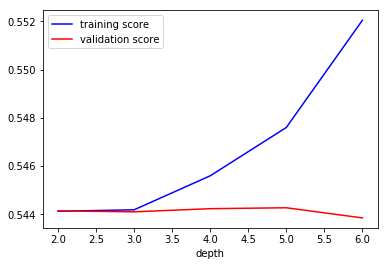

In [125]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve#allows for any given model a variety of parameter values

model = RandomForestClassifier(n_estimators=100)

depth = [2, 3, 4, 5, 6]#try a variety of parameters for model
train_score, val_score = validation_curve(
    model, X_train, y_train,
    param_name='max_depth', param_range=depth, 
    scoring='accuracy', cv=3)

plt.plot(depth, np.median(train_score, 1), color='blue', label='training score')
plt.plot(depth, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.xlabel('depth');
#like training with max-depth 2, train with 3, 4 etc

In [129]:
param_distributions = {#What is the distribution of values that we'll try
     'n_estimators': [100, 200],#Do exactly one hundred or two hundred
     'max_depth': [3]}#I can try different options for my pipeline
#in real world, you will have more parameter values

gridsearch = RandomizedSearchCV(
    RandomForestClassifier(n_jobs=-1, random_state=42),#parameters, what are the estimators we are using
    param_distributions=param_distributions,
    n_iter = 8,#if that took too long, can try like 4, tradeoff of runtime to optimization of solution
    #We have 2 n_estimators, multiply by 2 max depth, multiplied by criterion - 8 will exhaustively use all which will equal GridSearchCV
    #grid search would take too long, Randomized Search is faster
    #at 8 iterations, this equals grid search
    cv=3,
    scoring='accuracy',
    verbose=10,#operate where it's at, because it might take too long
    return_train_score=True
)

gridsearch.fit(X_train, y_train)

C:\Users\lilyx\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:271: UserWarning: The total space of parameters 2 is smaller than n_iter=8. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] n_estimators=100, max_depth=3 ...................................
[CV]  n_estimators=100, max_depth=3, score=0.5442302836461578, total=   0.3s
[CV] n_estimators=100, max_depth=3 ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  n_estimators=100, max_depth=3, score=0.5440235690235691, total=   0.3s
[CV] n_estimators=100, max_depth=3 ...................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s


[CV]  n_estimators=100, max_depth=3, score=0.5438168195976092, total=   0.4s
[CV] n_estimators=200, max_depth=3 ...................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.6s remaining:    0.0s


[CV]  n_estimators=200, max_depth=3, score=0.5441461156468311, total=   0.6s
[CV] n_estimators=200, max_depth=3 ...................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.5s remaining:    0.0s


[CV]  n_estimators=200, max_depth=3, score=0.5441077441077441, total=   0.6s
[CV] n_estimators=200, max_depth=3 ...................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.5s remaining:    0.0s


[CV]  n_estimators=200, max_depth=3, score=0.543985183938042, total=   0.7s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    4.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    4.5s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=8, n_jobs=None,
          param_distributions={'n_estimators': [100, 200], 'max_depth': [3]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring='accuracy', verbose=10)

In [130]:
gridsearch.best_score_

0.5440796857463525

In [131]:
X_train.head(1)

,amount_tsh,gps_height,num_private,region_code,district_code,population,construction_year,funder_num,installer_num,wpt_name_num,basin_num,subvillage_num,region_num,lga_num,ward_num,public_meeting_num,recorded_by_num,scheme_management_num,scheme_name_num,permit_num,extraction_type_num,extraction_type_group_num,extraction_type_class_num,management_num,management_group_num,payment_num,payment_type_num,water_quality_num,quality_group_num,quantity_num,quantity_group_num,source_num,source_type_num,source_class_num,waterpoint_type_num,waterpoint_type_group_num
49654,50.0,2104,0,21,1,230,1998,0,0,17159,0,0,8,2,19,0,0,0,1,0,3,1,0,9,4,4,5,6,2,2,2,8,6,0,1,1


In [133]:
from sklearn.model_selection import cross_val_score

models = [LogisticRegression(solver='lbfgs', max_iter=1000), 
          DecisionTreeClassifier(max_depth=3), 
          DecisionTreeClassifier(max_depth=None), 
          RandomForestClassifier(max_depth=3, n_estimators=100, n_jobs=-1, random_state=42), 
          RandomForestClassifier(max_depth=None, n_estimators=100, n_jobs=-1, random_state=42), 
          XGBClassifier(max_depth=3, n_estimators=100, n_jobs=-1, random_state=42)]

for model in models:
    print(model, '\n')
    score = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=5).mean()#you will likely write this line a lot
    print('Cross-Validation Accuracy:', score, '\n', '\n')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False) 

Cross-Validation Accuracy: 0.5440796864399644 
 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best') 

Cross-Validation Accuracy: 0.5434623237522409 
 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0